      TV  Radio  Newspaper  Sales
0  230.1   37.8       69.2   22.1
1   44.5   39.3       45.1   10.4
2   17.2   45.9       69.3   12.0
3  151.5   41.3       58.5   16.5
4  180.8   10.8       58.4   17.9
               TV       Radio   Newspaper       Sales
count  200.000000  200.000000  200.000000  200.000000
mean   147.042500   23.264000   30.554000   15.130500
std     85.854236   14.846809   21.778621    5.283892
min      0.700000    0.000000    0.300000    1.600000
25%     74.375000    9.975000   12.750000   11.000000
50%    149.750000   22.900000   25.750000   16.000000
75%    218.825000   36.525000   45.100000   19.050000
max    296.400000   49.600000  114.000000   27.000000
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   S

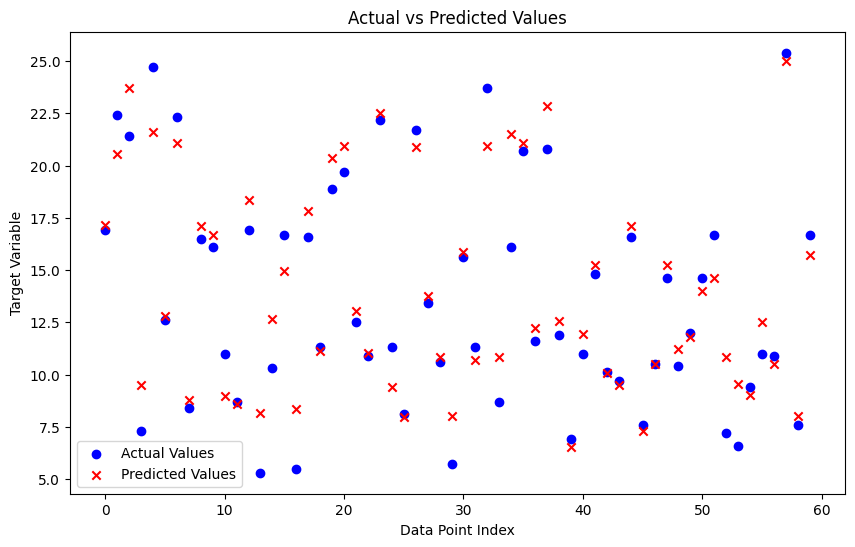

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics
import pandas as pd

advertising = pd.read_csv('/content/advertising.csv')
print(advertising.head())
print(advertising.describe())
print(advertising.info())

print("Feature values:")
x = advertising.iloc[:, :-1]
print(x)

print("Target variable values:")
y = advertising.iloc[:, -1]
print(y)

x_train, x_test, y_train, y_test = train_test_split(x, y,
test_size=0.3, random_state=42)
regressor = LinearRegression()
regressor.fit(x_train, y_train)
print("Intercept:", regressor.intercept_)
print("Coefficients:", regressor.coef_)

y_pred = regressor.predict(x_test)
print("Actual vs Predicted values:")
for actual, predicted in zip(y_test, y_pred):
  print("Actual value:", actual, "Predicted value:", predicted)

mislabeled_points = np.sum(np.round(y_test) != np.round(y_pred))
print ("Number of mislabeled points from test data set:", mislabeled_points)

mae = metrics.mean_absolute_error(y_test, y_pred)
mse = metrics.mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
print("Mean Absolute Error:", mae)
print("Mean Squared Error:", mse)
print("Root Mean Squared Error:", rmse)

plt.figure(figsize=(10, 6))
plt.scatter(range(len(y_test)), y_test, color='blue', label='Actual Values')
plt.scatter(range(len(y_pred)), y_pred, color='red', label='Predicted Values', marker='x')
plt.title('Actual vs Predicted Values')
plt.xlabel('Data Point Index')
plt.ylabel('Target Variable')
plt.legend()
plt.show()